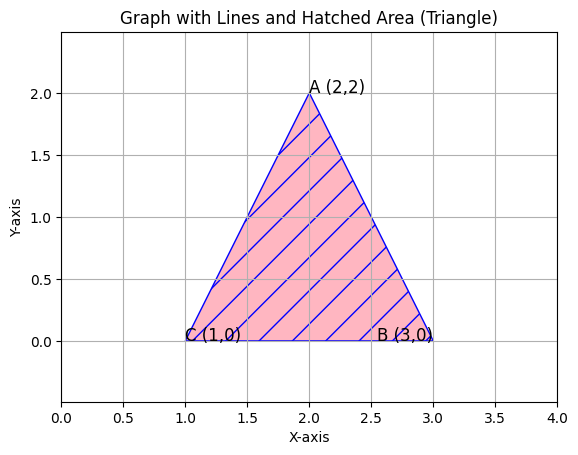

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

vertices = np.array([[1, 0], [3, 0], [2, 2]])

triangle = plt.Polygon(vertices, closed=True, fill=True, edgecolor='blue', facecolor='#FFB6C1', hatch='/', label='Area Inside Triangle')

fig, ax = plt.subplots()

ax.add_patch(triangle)

labels = ['C (1,0)', 'B (3,0)', 'A (2,2)']
for (x, y), label in zip(vertices, labels):
    ha = 'right' if x > 2 else 'left'
    ax.text(x, y, label, fontsize=12, ha=ha)

ax.set_xlim(0, 4)
ax.set_ylim(-1, 3)
ax.set_aspect('equal', adjustable='datalim')
ax.grid(True)
ax.set_title('Graph with Lines and Hatched Area (Triangle)')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

plt.show()



In [ ]:
import numpy as np
#define muculloch pitts
class McCulloch_Pitts_neuron():

  def __init__(self , weights , threshold):
    self.weights = weights
    self.threshold = threshold

  def model(self , x):

    if self.weights @ x >= self.threshold:
        return 1
    else:
        return 0

In [ ]:
#define model for dataset
def Area(x, y):
  neur1 = McCulloch_Pitts_neuron([2, 1], 6)
  neur2 = McCulloch_Pitts_neuron([0, 1], 0)
  neur3 = McCulloch_Pitts_neuron([-2, 1], -2)
  neur4 = McCulloch_Pitts_neuron([-1, 3, -1], 2.5)

  z1 = neur1.model(np.array([x, y]))
  z2 = neur2.model(np.array([x, y]))
  z3 = neur3.model(np.array([x, y]))
  z4 = neur4.model(np.array([z1, z2, z3]))

  return list([z4])

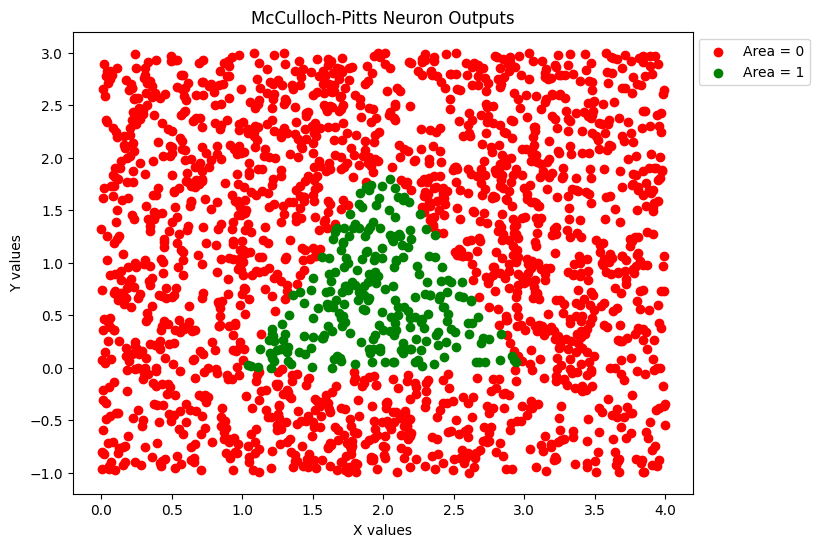

In [ ]:
random_seed = 64
np.random.seed(random_seed)

# Generate random data points
num_samples = 2000
x_samples = np.random.uniform(0, 4, num_samples)
y_samples = np.random.uniform(-1, 3, num_samples)

area_zero_points = []
area_one_points = []

for i in range(num_samples):
    area_value = Area(x_samples[i], y_samples[i])
    if area_value == [0]:
        area_zero_points.append((x_samples[i], y_samples[i]))
    else:
        area_one_points.append((x_samples[i], y_samples[i]))

# Separate x and y values for area_zero and area_one points
area_zero_x, area_zero_y = zip(*area_zero_points)
area_one_x, area_one_y = zip(*area_one_points)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(area_zero_x, area_zero_y, color='red', label='Area = 0')
plt.scatter(area_one_x, area_one_y, color='green', label='Area = 1')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('McCulloch-Pitts Neuron Outputs')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.show()


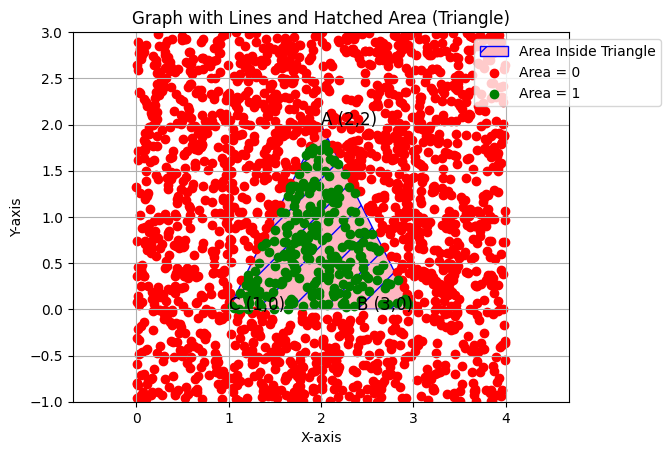

In [ ]:
random_seed = 64
np.random.seed(random_seed)

# Generate random data points
num_samples = 2000
x_samples = np.random.uniform(0, 4, num_samples)
y_samples = np.random.uniform(-1, 3, num_samples)

area_zero_points = []
area_one_points = []

for i in range(num_samples):
    area_value = Area(x_samples[i], y_samples[i])
    if area_value == [0]:
        area_zero_points.append((x_samples[i], y_samples[i]))
    else:
        area_one_points.append((x_samples[i], y_samples[i]))

area_zero_x, area_zero_y = zip(*area_zero_points)
area_one_x, area_one_y = zip(*area_one_points)

vertices = np.array([[1, 0], [3, 0], [2, 2]])

triangle = plt.Polygon(vertices, closed=True, fill=True, edgecolor='blue', facecolor='#FFB6C1', hatch='/', label='Area Inside Triangle')

fig, ax = plt.subplots()

ax.add_patch(triangle)

labels = ['C (1,0)', 'B (3,0)', 'A (2,2)']
for (x, y), label in zip(vertices, labels):
    ha = 'right' if x > 2 else 'left'
    ax.text(x, y, label, fontsize=12, ha=ha)

ax.scatter(area_zero_x, area_zero_y, color='red', label='Area = 0')
ax.scatter(area_one_x, area_one_y, color='green', label='Area = 1')

ax.set_xlim(0, 4)
ax.set_ylim(-1, 3)
ax.set_aspect('equal', adjustable='datalim')
ax.grid(True)
ax.set_title('Graph with Lines and Hatched Area (Triangle)')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

plt.show()

### changing the Activision function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define McCulloch-Pitts neuron with different activation functions
class McCulloch_Pitts_neuron():

    def __init__(self, weights, activation='threshold', threshold=0):
        self.weights = np.array(weights)
        self.activation = activation
        self.threshold = threshold

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def tanh(self, x):
        return np.tanh(x)

    def relu(self, x):
        return np.maximum(0, x)

    def model(self, x):
        linear_output = self.weights @ x
        if self.activation == 'threshold':
            return 1 if linear_output >= self.threshold else 0
        elif self.activation == 'sigmoid':
            return self.sigmoid(linear_output)
        elif self.activation == 'tanh':
            return self.tanh(linear_output)
        elif self.activation == 'relu':
            return self.relu(linear_output)
        else:
            raise ValueError("Unsupported activation function")

# Define model for dataset
def Area(x, y, activation='threshold'):
    neur1 = McCulloch_Pitts_neuron([2, 1], activation=activation, threshold=6)
    neur2 = McCulloch_Pitts_neuron([0, 1], activation=activation, threshold=0)
    neur3 = McCulloch_Pitts_neuron([-2, 1], activation=activation, threshold=-2)
    neur4 = McCulloch_Pitts_neuron([-1, 3, -1], activation=activation, threshold=2.5)

    z1 = neur1.model(np.array([x, y]))
    z2 = neur2.model(np.array([x, y]))
    z3 = neur3.model(np.array([x, y]))
    z4 = neur4.model(np.array([z1, z2, z3]))

    return z4


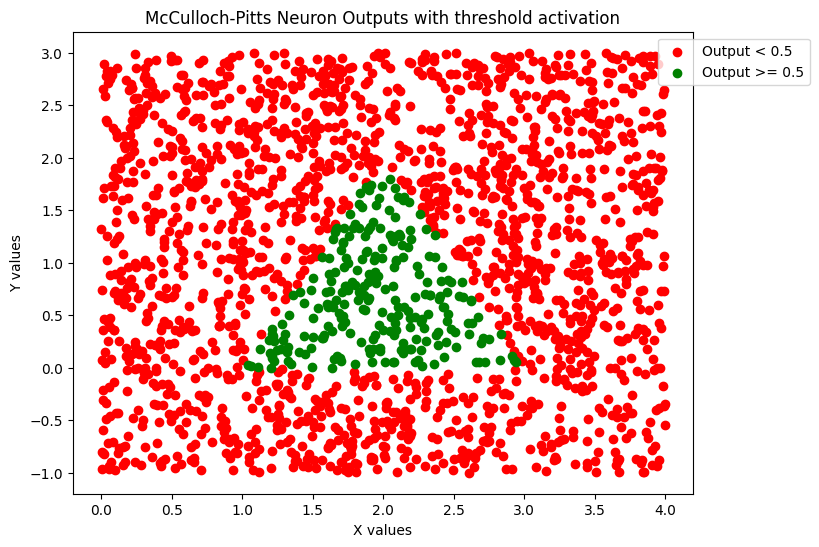

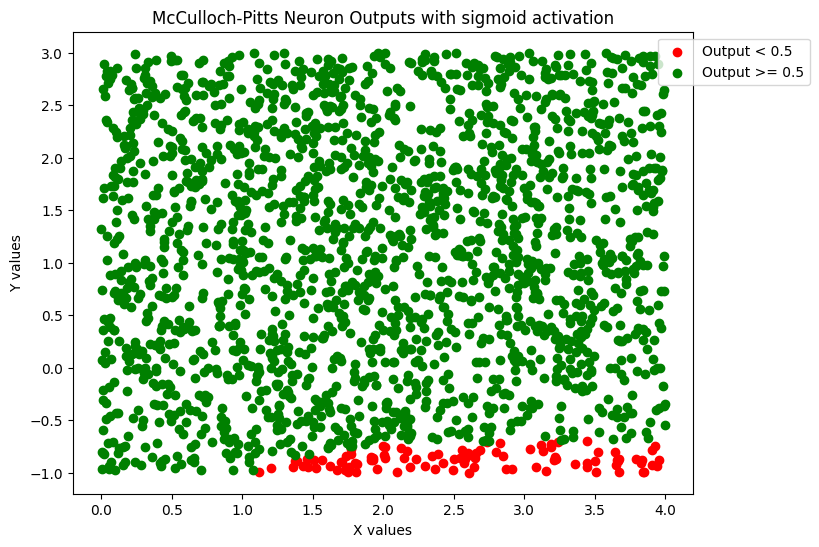

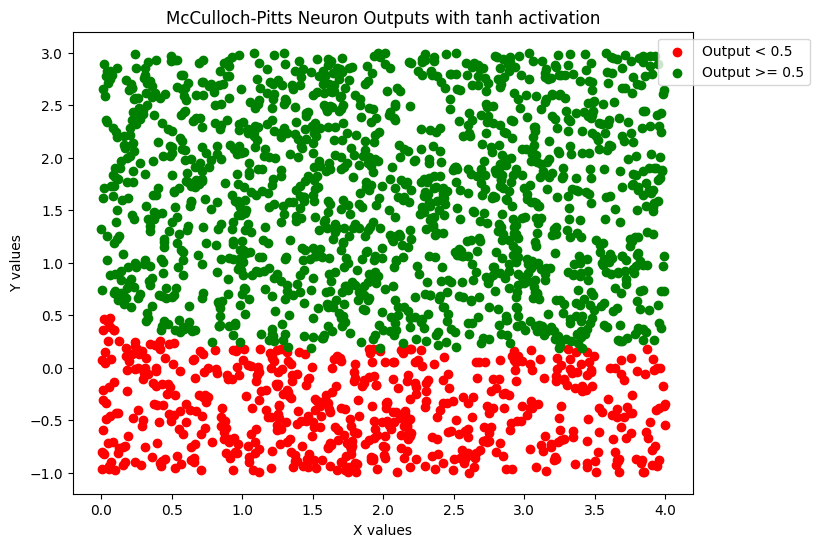

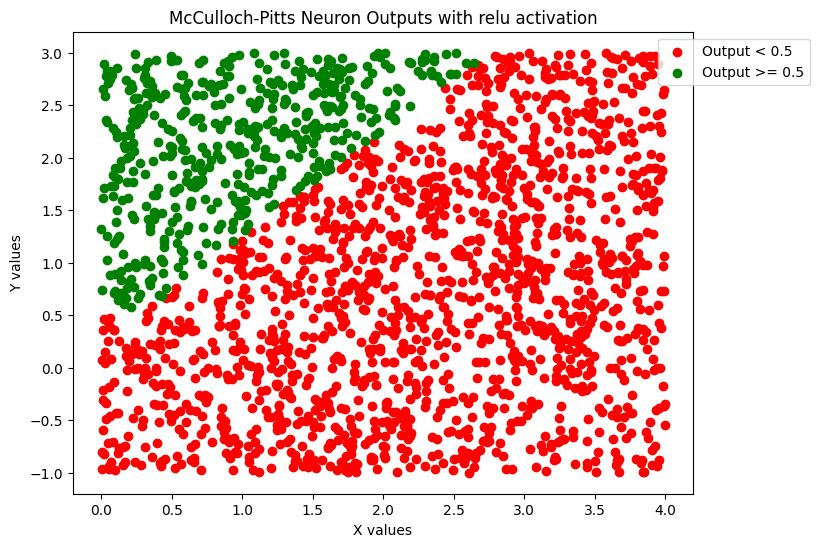

In [ ]:
def classify_and_plot(activation):

    random_seed = 64
    np.random.seed(random_seed)

    num_points = 2000
    x_values = np.random.uniform(0, 4, num_points)
    y_values = np.random.uniform(-1, 3, num_points)

    red_points = []
    green_points = []

    for i in range(num_points):
        z4_value = Area(x_values[i], y_values[i], activation=activation)
        if z4_value < 0.5:
            red_points.append((x_values[i], y_values[i]))
        else:
            green_points.append((x_values[i], y_values[i]))

    red_x, red_y = zip(*red_points) if red_points else ([], [])
    green_x, green_y = zip(*green_points) if green_points else ([], [])

    plt.figure(figsize=(8, 6))
    plt.scatter(red_x, red_y, color='red', label='Output < 0.5')
    plt.scatter(green_x, green_y, color='green', label='Output >= 0.5')
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title(f'McCulloch-Pitts Neuron Outputs with {activation} activation')
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
    plt.show()

classify_and_plot('threshold')
classify_and_plot('sigmoid')
classify_and_plot('tanh')
classify_and_plot('relu')
